# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [48]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

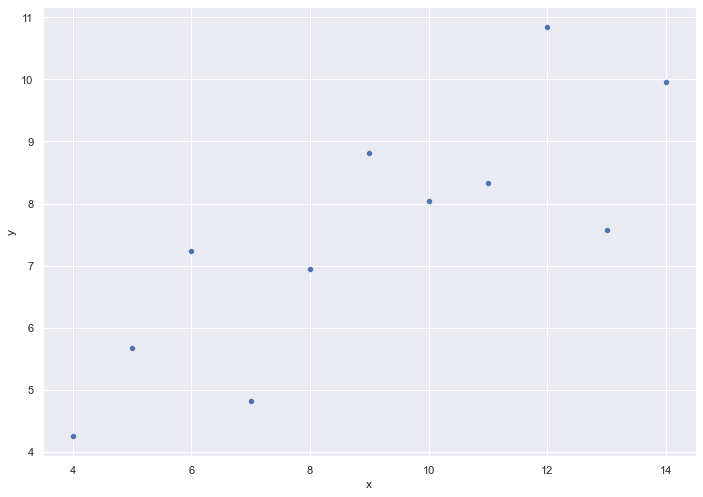

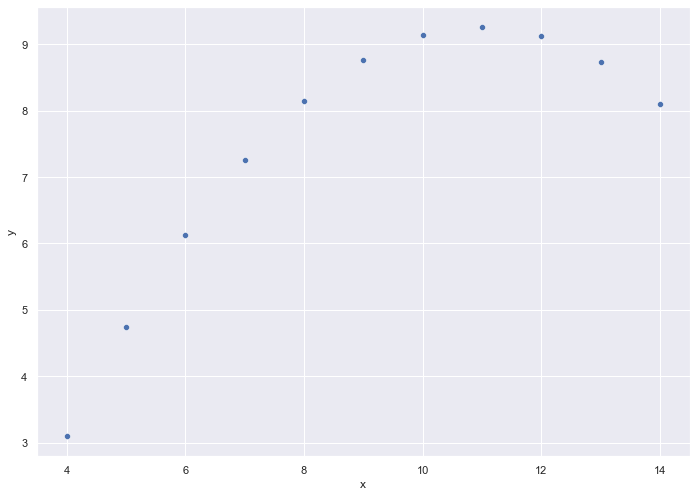

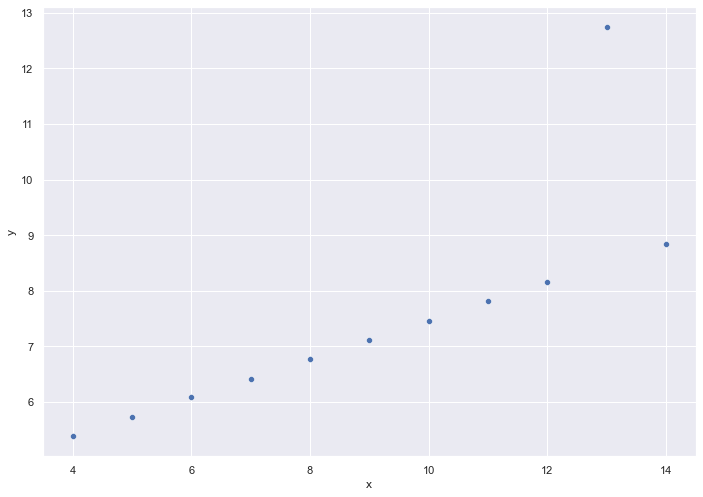

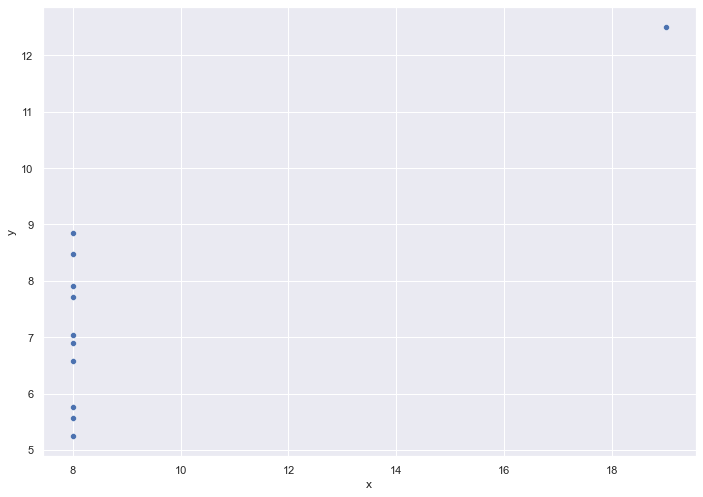

In [50]:
#graficos

#selecion de datos por grupo
for group in df["grupo"].unique():
    df_g = df.loc[df["grupo"] == group, ["x","y"]].reset_index()
    
    #grafico
    sns.scatterplot(
        x = "x",
        y = "y",
        data = df_g
    )
    plt.show()

Son completamente diferentes

In [21]:
#realizando resumen

i=1
#selecionando por grupos
for group in df["grupo"].unique():
    df_g = df.loc[df["grupo"] == group, ["x","y"]].reset_index() 
    
    #visualización
    print("Grupo "+str(i))
    display(df_g.describe())
    
    i += 1

Grupo 1


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


Grupo 2


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


Grupo 3


,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


Grupo 4


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Los datos tienen media y desviación estandar identicas, lo que puede llevar al error de asumir que los datos son similares.

beta 1 Grupo_1= 0.5000909090909091
beta 0 Grupo_1= 3.0000909090909103



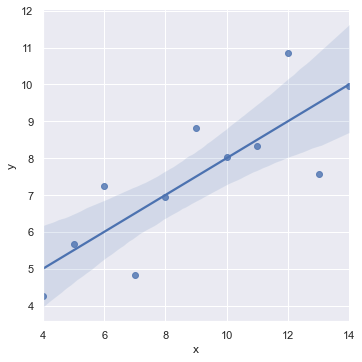

beta 1 Grupo_2= 0.5
beta 0 Grupo_2= 3.000909090909091



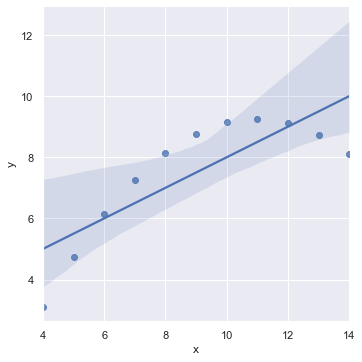

beta 1 Grupo_3= 0.49972727272727274
beta 0 Grupo_3= 3.0024545454545466



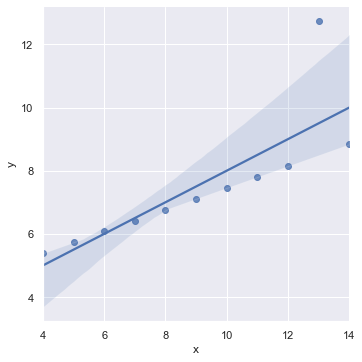

beta 1 Grupo_4= 0.49990909090909086
beta 0 Grupo_4= 3.0017272727272726



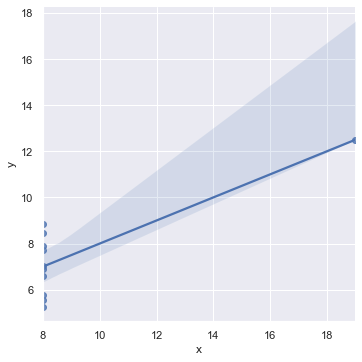

In [56]:
#regresión
def lin_reg(df):
    num = 0
    den = 0
    for i in range(df_g.shape[0]):
        num += (df_g.at[i,"x"] - df_g.mean()["x"])*(df_g.at[i,"y"] - df_g.mean()["y"])
        den += (df_g.at[i,"x"] - df_g.mean()["x"])**2
        
    return (df_g.mean()["y"]-(num/den)*df_g.mean()["x"],num/den)
        
#selecionando por grupos
for group in df["grupo"].unique():
    df_g = df.loc[df["grupo"] == group, ["x","y"]].reset_index()  
    
    #regresión por grupo
    beta_0, beta_1 = lin_reg(df_g)
    
    #visualización
    print(f"beta 1 {group}= {beta_1}")
    print(f"beta 0 {group}= {beta_0}\n")
    
    sns.lmplot(
    x='x',
    y='y',
    data=df_g
    )  
    plt.show()

Debido a la similaridad de parametros de distribucion de las variables, la regresion lineal entrega un valor muy similar para los parametros de la recta, a pesar de que los datos son distintos

In [67]:
#R**2

#funcion para los estimados de y
def lineal(x,b_0,b_1):
    return b_0 + b_1*x


#selecionando por grupos
for group in df["grupo"].unique():
    ss_reg = 0
    ss_res = 0
    df_g = df.loc[df["grupo"] == group, ["x","y"]].reset_index()
    beta_0,beta_1 = lin_reg(df_g)
    
    #calculo de R**2
    for i in range(df_g.shape[0]):
        ss_reg += ( lineal(df_g.at[i,"x"],beta_0,beta_1) - df_g["y"].mean() )**2
        ss_res += ( df_g.at[i,"y"] - lineal(df_g.at[i,"x"],beta_0,beta_1) )**2
    R2 = ss_reg/(ss_reg + ss_res)
    print (f"R**2 para el grupo {group} es: {R2}")

R**2 para el grupo Grupo_1 es: 0.666542459508775
R**2 para el grupo Grupo_2 es: 0.6662420337274841
R**2 para el grupo Grupo_3 es: 0.6663240410665591
R**2 para el grupo Grupo_4 es: 0.6667072568984652


In [71]:
#MAE

#selecionando por grupos
for group in df["grupo"].unique():
    mae = 0
    df_g = df.loc[df["grupo"] == group, ["x","y"]].reset_index()
    beta_0,beta_1 = lin_reg(df_g)
    
    #calculo de MAE
    for i in range(df_g.shape[0]):
        mae += abs( df_g.at[i,"y"] - lineal(df_g.at[i,"x"],beta_0,beta_1) )
    mae = mae/df_g.shape[0]
    
    print (f"MAE para el grupo {group} es: {mae}")

MAE para el grupo Grupo_1 es: 0.8374049586776859
MAE para el grupo Grupo_2 es: 0.9679338842975208
MAE para el grupo Grupo_3 es: 0.7159669421487608
MAE para el grupo Grupo_4 es: 0.902727272727273


In [73]:
#MSE
#selecionando por grupos
for group in df["grupo"].unique():
    mse = 0
    df_g = df.loc[df["grupo"] == group, ["x","y"]].reset_index()
    beta_0,beta_1 = lin_reg(df_g)
    
    #calculo de MSE
    for i in range(df_g.shape[0]):
        mse += ( df_g.at[i,"y"] - lineal(df_g.at[i,"x"],beta_0,beta_1) )**2
    mse = mse/df_g.shape[0]
    
    print (f"MSE para el grupo {group} es: {mse}")

MSE para el grupo Grupo_1 es: 1.2511536363636362
MSE para el grupo Grupo_2 es: 1.2523900826446281
MSE para el grupo Grupo_3 es: 1.250562892561984
MSE para el grupo Grupo_4 es: 1.249317272727273


In [74]:
#MAPE

#selecionando por grupos
for group in df["grupo"].unique():
    mape = 0
    df_g = df.loc[df["grupo"] == group, ["x","y"]].reset_index()
    beta_0,beta_1 = lin_reg(df_g)
    
    #calculo de MAPE
    for i in range(df_g.shape[0]):
        mape += abs( (df_g.at[i,"y"] - lineal(df_g.at[i,"x"],beta_0,beta_1))/df_g.at[i,"y"] )
    mape = mape/df_g.shape[0]
    
    print (f"MAPE para el grupo {group} es: {mape}")

MAPE para el grupo Grupo_1 es: 0.12125783477322831
MAPE para el grupo Grupo_2 es: 0.1569518620016047
MAPE para el grupo Grupo_3 es: 0.07970727611180323
MAPE para el grupo Grupo_4 es: 0.13473848647069778


Las medidas nos indican que el ajuste lineal es un mal ajuste para los datos en todos los grupos.

Para el grupo 1, no existe manera de manejar los datos para que el ajuste lienal sea mejor.

Para el grupo 2, se puede intentar un modelo cuadratico en vez de lineal.

Para el grupo 3, se puede eliminar el valor outlier.

Para el grupo 4, eliminar el valor outlier nos deja con un grupo de datos para los cuales no existe una pendiente para la funcion lineal que se ajuste a los puntos por lo que tampoco existe manera de que el ajuste lineal sea mejor.